In [1]:
#import necessary packages
from bs4 import BeautifulSoup
from datetime import datetime
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from IPython.core.display import clear_output
from IPython.display import Image
from random import randint
from requests import get
from tabulate import tabulate
from time import sleep
from time import time
from warnings import warn
import csv
import pandas as pd
import re
import smtplib

This Notebook has the aim to scrape data from a job site and send it via email to someone

Steps:
    1. Extract (ID, Beschreibung, Datum, Link)
    2. Setup email and send

#    1. Extract (ID, Beschreibung, Datum, Link)

In [2]:
#Set the variables for the scraper
headers = {"Accept-Language": "en-US, en;q=0.5"}
pages = [str(i) for i in range(1,10)]

In [3]:
# List to store data in
IDs = []
Dates = []
Titles = []
Links = []
Descriptions = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every page in the interval 1-5
for page in pages:

    # Make a get request
    response = get('https://www.dgpraec.de/jobboerse/page/' + page, headers = headers)

    # Pause the loop
    sleep(randint(8,15))

    # Monitor the requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))

    # Break the loop if the number of requests is greater than expected
    if requests > 72:
        warn('Number of requests was greater than expected.')  
        break 

    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the Job containers from a single page
    job_container = page_html.find_all('article', class_ =lambda value: value and value.startswith("post-"))

    # For every job of these
    for container in job_container:
    
        # IDs
        ID = container.get('id')
        IDs.append(ID)
        
        #Dates
        Date = container.div.text
        Dates.append(str(Date))
        
        #Titles
        Title = container.a.text
        Titles.append(Title)
        
        #Links
        Link = container.find_all('a')
        Links.append(Link)
        
        #Descriptions
        Description = container.p.text
        Descriptions.append(Description)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:29: UserWarning: Request: 9; Status code: 404


In [4]:
#Create dataframe
Job_list = pd.DataFrame({'ID': IDs, 
                        'Date': Dates,
                        'Title': Titles,
                        'Link': Links,
                        'Description': Descriptions})
print(Job_list.info())
Job_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
Date           30 non-null object
Description    30 non-null object
ID             30 non-null object
Link           30 non-null object
Title          30 non-null object
dtypes: object(5)
memory usage: 1.2+ KB
None


,Date,Description,ID,Link,Title
0,\n 30. April 2019,STAFF PHYSICIAN Hôpitaux Universitaires Genève...,post-6227,"[<a href=""https://www.dgpraec.de/jobs/staff-ph...",„Staff Physician“ in Genf gesucht
1,\n 23. April 2019,Wir suchen einen Facharzt Plastische Chirurgie...,post-6170,"[<a href=""https://www.dgpraec.de/jobs/universi...","Universitätsklinikum Leipzig, Bereich Plastisc..."
2,\n 18. April 2019,Facharzt (m/w/d) für Plastische und Ästhetisch...,post-6177,"[<a href=""https://www.dgpraec.de/jobs/facharzt...",Facharzt (m/w/d) in Freiburg gesucht
3,\n 18. April 2019,Assistenzarzt / -Ärztin im zweiten Drittel der...,post-6174,"[<a href=""https://www.dgpraec.de/jobs/assisten...",Assistenzarzt / -ärztin im zweiten Drittel der...
4,\n 12. April 2019,Die Ev. Krankenhaus Göttingen-Weende gGmbH ist...,post-6160,"[<a href=""https://www.dgpraec.de/jobs/oberarzt...",Oberarzt (m/w) in Göttingen-Weende gesucht
5,\n 9. April 2019,Das Klinikum Kulmbach ist ein fortschrittliche...,post-6135,"[<a href=""https://www.dgpraec.de/jobs/oberarzt...",Oberarzt mit der Option zum Leitenden Oberarzt...
6,\n 3. April 2019,Das Städtische Krankenhaus Pirmasens ist ein m...,post-6101,"[<a href=""https://www.dgpraec.de/jobs/klinik-f...",Klinik für Plastische Chirurgie und Handchirur...
7,\n 3. April 2019,Die Krankenhäuser Landshut-Achdorf und Vilsbib...,post-6099,"[<a href=""https://www.dgpraec.de/jobs/facharzt...",Facharzt (m/w/d) für Plastische und Ästhetisch...
8,\n 28. März 2019,Die medius Klinik Nürtingen ist ein akademisch...,post-6067,"[<a href=""https://www.dgpraec.de/jobs/leitende...",Leitender Oberarzt (m/w/d) oder Oberarzt (m/w...
9,\n 20. März 2019,Integriert in einem regionalen Verbund von 6 K...,post-6038,"[<a href=""https://www.dgpraec.de/jobs/die-klin...","Die Klinik für Plastische, Rekonstruktive und ..."


In [5]:
#some cleaning
Job_list.dtypes

Date           object
Description    object
ID             object
Link           object
Title          object
dtype: object

In [6]:
#Date
Job_list['Date'] = Job_list.Date.str.strip()
Job_list['Date'] = Job_list.Date.str.replace('Januar', 'January')
Job_list['Date'] = Job_list.Date.str.replace('Februar', 'February')
Job_list['Date'] = Job_list.Date.str.replace('März', 'March')
Job_list['Date'] = Job_list.Date.str.replace('April', 'April')
Job_list['Date'] = Job_list.Date.str.replace('Mai', 'May')
Job_list['Date'] = Job_list.Date.str.replace('Juni', 'June')
Job_list['Date'] = Job_list.Date.str.replace('Juli', 'July')
Job_list['Date'] = Job_list.Date.str.replace('August', 'August')
Job_list['Date'] = Job_list.Date.str.replace('September', 'September')
Job_list['Date'] = Job_list.Date.str.replace('Oktober', 'October')
Job_list['Date'] = Job_list.Date.str.replace('November', 'November')
Job_list['Date'] = Job_list.Date.str.replace('Dezember', 'December')
Job_list['Date'] = pd.to_datetime(Job_list.Date)
Job_list['Date']

0    2019-04-30
1    2019-04-23
2    2019-04-18
3    2019-04-18
4    2019-04-12
5    2019-04-09
6    2019-04-03
7    2019-04-03
8    2019-03-28
9    2019-03-20
10   2019-03-19
11   2019-03-19
12   2019-03-14
13   2019-03-14
14   2019-03-14
15   2019-03-13
16   2019-03-13
17   2019-03-12
18   2019-03-11
19   2019-03-07
20   2019-03-05
21   2019-03-05
22   2019-03-04
23   2019-03-01
24   2019-03-01
25   2019-02-13
26   2019-02-12
27   2019-02-11
28   2019-02-11
29   2019-02-07
Name: Date, dtype: datetime64[ns]

In [10]:
Job_list['Label'] = "refreshed_list"

#    2. Setup email and send

We need an algorithm which goes as follows -if the script will be run daily-: If one of the ids in the new list will matched with the new result, then send email

In [12]:
#We load the old results into our script
Job_list_old = pd.read_csv('Output_old.CSV', engine='python', encoding='utf-8', index_col=0)
Job_list_old['Label'] = "old_list"
print(Job_list_old.head(5))

         Date                                        Description         ID  \
0  2019-04-23  Als eines der größten Gesundheitsunternehmen d...  post-6180   
1  2019-04-23  Wir suchen einen Facharzt Plastische Chirurgie...  post-6170   
2  2019-04-18  Facharzt (m/w/d) für Plastische und Ästhetisch...  post-6177   
3  2019-04-18  Assistenzarzt / -Ärztin im zweiten Drittel der...  post-6174   
4  2019-04-12  Die Ev. Krankenhaus Göttingen-Weende gGmbH ist...  post-6160   

                                                Link  \
0  [<a href="https://www.dgpraec.de/jobs/assisten...   
1  [<a href="https://www.dgpraec.de/jobs/universi...   
2  [<a href="https://www.dgpraec.de/jobs/facharzt...   
3  [<a href="https://www.dgpraec.de/jobs/assisten...   
4  [<a href="https://www.dgpraec.de/jobs/oberarzt...   

                                               Title     Label  
0  Assistenzarzt (m/w/d) in Vollzeit in Koblenz g...  old_list  
1  Universitätsklinikum Leipzig, Bereich Plastisc...  old_

In [13]:
#Every job has an ID. So our job is now to compare the current results (Job_list) with the old results (Job_list_old)
str(Job_list.ID) == str(Job_list_old.ID)
#False means that there is a new job in the list
#True means no new jobs

False

In [16]:
Job_list_difference = pd.concat([Job_list_old,Job_list])
Job_list_difference = Job_list_difference.drop_duplicates(subset = ['ID'], keep=False)
Job_list_difference = Job_list_difference[Job_list_difference['Label']== "refreshed_list"]
Job_list_difference = Job_list_difference.drop(Job_list_difference.columns[[1, 2, 3]], axis=1)
Job_list_difference['Date'] = pd.to_datetime(Job_list_difference.Date).dt.strftime('%d-%m-%y')
Job_list_difference = Job_list_difference.sort_values(by=['Date'], ascending=False)
Job_list_difference

,Date,Link,Title
0,30-04-19,"[<a href=""https://www.dgpraec.de/jobs/staff-ph...",„Staff Physician“ in Genf gesucht


In [12]:
#Setting up of the email variables
me = 'senderemail'
password = 'pwd'
server = 'smtp.gmail.com:587'
you = 'recipientemail'

text = """
Dear Recipient,

This is the email to inform you about the new job(s):

{table}

Regards,

The Sender"""

html = """
<html><body><p>Dear Recipient,</p>
<p>This is the email to inform you about the new job(s)</p>
{table}
<p>Regards,</p>
<p>Me</p>
</body></html>
"""

In [13]:
#An algorithm could look like this

#Check if the IDs are the same
if str(Job_list.ID) == str(Job_list_old.ID):
    print("Same - no email")
else:
    print("not same - email triggered")
    
#Creation of difference list
    Job_list_difference = pd.concat([Job_list_old,Job_list])
    Job_list_difference = Job_list_difference.drop_duplicates(subset = ['ID'], keep=False)
    Job_list_difference = Job_list_difference[Job_list_difference['Label']== "refreshed_list"]
    Job_list_difference = Job_list_difference.drop(Job_list_difference.columns[[1, 2, 3]], axis=1)
    Job_list_difference['Date'] = pd.to_datetime(Job_list_difference.Date).dt.strftime('%d-%m-%y')
    Job_list_difference = Job_list_difference.sort_values(by=['Date'], ascending=False)
    Job_list_difference.to_csv('Output_difference.CSV',sep=',')
    
#Sending of email
    with open('Output_difference.CSV', encoding='utf-8') as input_file:
        reader = csv.reader(input_file)
        data = list(reader)
    
    text = text.format(table=tabulate(data, headers="firstrow", tablefmt="grid"))
    html = html.format(table=tabulate(data, headers="firstrow", tablefmt="html"))

    message = MIMEMultipart(
        "alternative", None, [MIMEText(text), MIMEText(html,'html')])

    message['Subject'] = "Your data"
    message['From'] = me
    message['To'] = you
    server = smtplib.SMTP(server)
    server.ehlo()
    server.starttls()
    server.login(me, password)
    server.sendmail(me, you, message.as_string())
    server.quit()

not same - email triggered


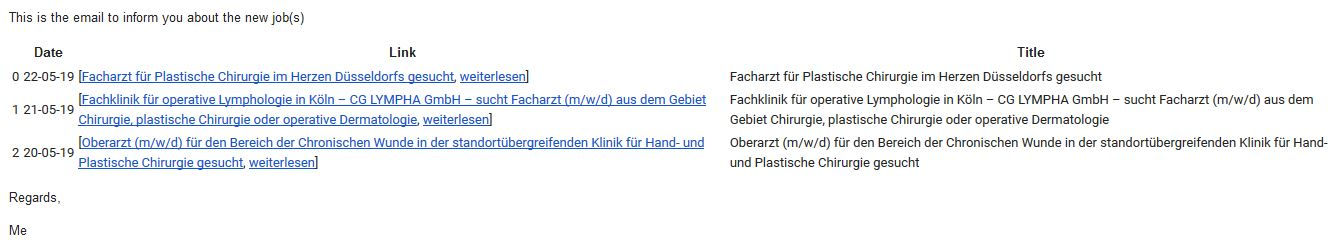

In [3]:
#The email looks like this
Image(filename='Screenshot.jpg') 

In [17]:
#Finally we need to save the "old" results into a csv
Job_list.to_csv('Output_old.CSV',sep=',')
#IF the script is running daily we then have a reference point for the current data

It is possible to run this script on a regular basis via nbconvert and crontab (Linux) or task manager (Windows).